In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['NUMBA_DISABLE_JIT'] = '1'

In [2]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import run_to_steady_state
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
from PySDM.physics.constants import si
import pickle as pkl

ran Straub2010 for 4096 superdroplets


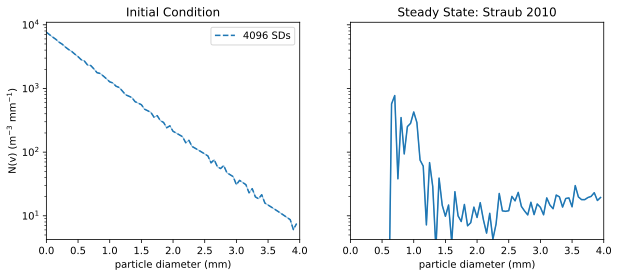

HTML(value="<a href='./straub_fig10.pdf' target='_blank'>./straub_fig10.pdf</a><br>")

In [30]:
run_sims = True
n_sds = [2**6, 2**9, 2**12]
steps = [0, 7200]
nruns = 5

fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)

# Obtain data
parameterization = 'Straub2010'
for n_sd in n_sds:
    if run_sims:
        run_to_steady_state(parameterization, n_sd, steps, nruns)
        print('ran '+parameterization+' for '+str(n_sd)+' superdroplets')
    data_filename = 'data/steadystate_' + parameterization + '_' + str(n_sd) + 'sd.pkl'
    with open(data_filename, 'rb') as handle:
        (x,y_ensemble,rates) = pkl.load(handle)
    
    # statistics
    y_mean = np.mean(y_ensemble, axis=0)
    y_std = np.std(y_ensemble, axis=0)

    # Plotting
    cmap = matplotlib.cm.get_cmap('viridis')
    dr = np.diff(x) * si.um
    dr = np.concatenate([dr, [dr[-1]]])

    legend_entries = []

    color = next(ax[0]._get_lines.prop_cycler)['color']
    for (j, step) in enumerate(steps):  # pylint: disable=protected-access
        if step != 0:
            lbl = str(n_sd) + ' SDs'
            ax[1].plot(2*x/1000,y_mean[j]/2/dr * si.mm,linestyle='-',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            ax[1].fill_between(2*x/1000, y_mean[j]/2/dr * si.mm - y_std[j]/2/dr * si.mm, 
                               y_mean[j]/2/dr * si.mm + y_std[j]/2/dr * si.mm, color=color, alpha=0.5)
        else:
            lbl = str(n_sd) + ' SDs'
            ax[0].plot(2*x/1000,y_mean[j]/2/dr * si.mm,linestyle='--',color=color,
                    label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            ax[0].fill_between(2*x/1000, y_mean[j]/2/dr * si.mm - y_std[j]/2/dr * si.mm, 
                               y_mean[j]/2/dr * si.mm + y_std[j]/2/dr * si.mm, color=color, alpha=0.5)

ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlim([0.0, 4.0])
ax[1].set_xlim([0.0, 4.0])
ax[0].set_xlabel("particle diameter (mm)")
ax[1].set_xlabel("particle diameter (mm)")
ax[0].set_ylabel("N(v) (m$^{-3}$ mm$^{-1})$")
ax[0].legend()
ax[0].set_title("Initial Condition")
ax[1].set_title("Steady State: Straub 2010")
show_plot('straub_fig10.pdf')